In [1]:
import torch 
from rbi.utils.autograd_tools import batch_jacobian 

import matplotlib.pyplot as plt

In [38]:
A = torch.tensor([[ 1.5672, -0.3508],
        [-0.3508,  0.0885]])

In [80]:
def f(x):
    return torch.einsum("kj, ij, ki -> k",x, A, x) + 5*torch.sin(2*x[:, 0]) + 5*torch.cos(2*x[:,1])

(-0.5, 199.5, 199.5, -0.5)

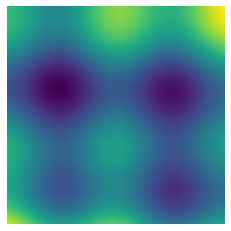

In [81]:
x = torch.linspace(-3, 3, 200)
y = torch.linspace(-3, 3, 200)
XX,YY = torch.meshgrid(x,y)
pos = torch.hstack([XX.reshape(-1,1), YY.reshape(-1,1)])
z = f(pos)

plt.imshow(z.reshape(200, 200))
plt.axis("off")

In [94]:
point = torch.randn((1,2))
point

tensor([[-2.0559,  0.6473]])

c:\ProgramData\Miniconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
c:\ProgramData\Miniconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


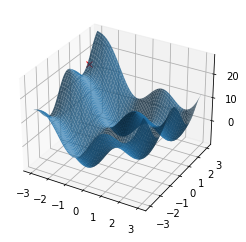

In [98]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(XX, YY, z.reshape(200,200), alpha=0.8)
_ = ax.plot(point[:,0],point[:,1], f(point).squeeze()+10, "x", color="red")

In [107]:
Js = batch_jacobian(lambda x: f(x).unsqueeze(0), point)

In [110]:
def sample_directional_derivaitives(Js):
    w = torch.randn((10000, 2))
    v = w/torch.linalg.norm(w, dim=-1, keepdim=True)
    dir = (Js@v.T).T
    return dir

(array([2102.,  927.,  705.,  637.,  674.,  626.,  655.,  764.,  937.,
        1973.]),
 array([-1.4916695e+01, -1.1933355e+01, -8.9500160e+00, -5.9666767e+00,
        -2.9833374e+00,  1.9073486e-06,  2.9833412e+00,  5.9666805e+00,
         8.9500198e+00,  1.1933359e+01,  1.4916698e+01], dtype=float32),
 <BarContainer object of 10 artists>)

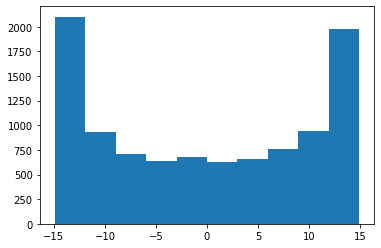

In [115]:
samples = sample_directional_derivaitives(Js[0])
plt.hist(samples.numpy())

In [116]:
samples.var()

tensor(111.1260)

In [118]:
1/2*Js[0]@Js[0].T

tensor([[111.2540]])

In [185]:
A= torch.randn(2,2)
A = A@A.T + torch.eye(2) * 0.1
p = torch.distributions.MultivariateNormal(torch.zeros(2), A)

In [186]:
samples = p.sample((100000,))

v = samples/torch.linalg.norm(samples, keepdim=True, dim=-1)

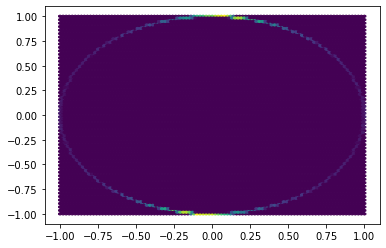

In [187]:
plt.hexbin(v[:,0], v[:,1])

In [188]:
def quadratic_norm(x, A):
    return torch.einsum("kj, ij, ki -> k",x, torch.linalg.inv(A), x).unsqueeze(0).T.sqrt()

In [189]:
v = samples/quadratic_norm(samples, A)

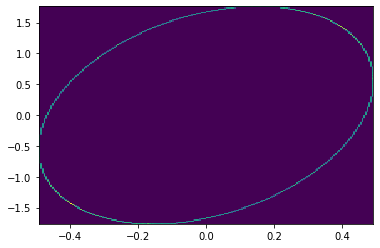

In [199]:
_ = plt.hist2d(v[:,0].numpy(), v[:,1].numpy(), bins=200)